###  Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy.geocoders import Nominatim



### Get existing schema from EC header

In [2]:
# Use only 1st row, header = None, so that we can use the header
#ec = pd.read_csv('Earth Challenge.csv',nrows=1,header = None)
#ecAr = pd.array(ec[1])
#print((ecAr[0]))

ec = pd.read_csv('Earth Challenge.csv',low_memory=False)
header = pd.array(ec.columns)
print(header)

<PandasArray>
[                              'X',                               'Y',
                        'OBJECTID',                'RecordSequenceID',
                        'UniqueID',                        'SourceID',
                  'LocationFreqID',                        'Location',
                         'Dataset',                    'Organization',
                           'Other',          'CountryName_FromSource',
        'SubCountry_L1_FromSource',        'SubCountry_L2_FromSource',
                      'Longitude1',                       'Latitude1',
                      'Longitude2',                       'Latitude2',
                    'TotalWidth_m',                   'TotalLength_m',
                  'TotalArea_Sq_m',                   'ShorelineName',
                  'WaterfrontName',              'BeachAreaLandcover',
                       'BeachType',                       'EventType',
                 'TotalVolunteers',                    'DateOri

### Open Literatti database

In [3]:
litter = pd.read_csv('Litterati.csv')
print(litter['Location (Lat/Long)'])

0        42.1889634352895/-71.8448098585561
1         42.188742998623/-71.8447079596796
2        42.1887950511299/-71.8446159129388
3        42.1889483562912/-71.8447523633756
4        42.1890105371223/-71.8447870765504
                        ...                
49995    37.9701970744255/-87.5427435394234
49996    37.9703921845795/-87.5426918912892
49997    37.9701643760669/-87.5427652331434
49998    37.9701999056073/-87.5427131712542
49999     37.9702355075375/-87.542762824684
Name: Location (Lat/Long), Length: 50000, dtype: object


### ^^ Above we see that Latitude and Longitude are grouped together

## Function sepXY(str)
### The function takes a string of the sort str = '42.1889634352895/-71.8448098585561'
### then separates it into two separate coordinates representing Latitude and Longitude 
### returns: a list with 2 strings representing Latitude and Longitude 


In [4]:
def sepXY(str):
    x = ''
    y = ''
    count = 0
    for c in str:
        if(c == '/'):
            count += 1
            break
        else:
            x += c
        count += 1 
    for c in str[count:]:
        y += c
    list = [x,y]
    return list

str = '42.1889634352895/-71.8448098585561'
Len = sepXY(str)[0]
long = sepXY(str)[1]
print(Len)
print(long)
print(type(Len))

42.1889634352895
-71.8448098585561
<class 'str'>


### Get Coordinates X Y

In [5]:
# Make an array containing the location column
loc = pd.array(litter['Location (Lat/Long)'])
lat = []
long = []

counter = 0
for i in loc:
    
    latLong = sepXY(i)
    lat.append(latLong[0])
    long.append(latLong[1])
    counter += 1
 
    # Example Dataframe with just coordinates  
    # header[0] = 'X', header[1] = 'Y' 
dict = {header[0] : lat, header[1] : long}
coord = pd.DataFrame(dict)
print(coord)
    



                      X                  Y
0      42.1889634352895  -71.8448098585561
1       42.188742998623  -71.8447079596796
2      42.1887950511299  -71.8446159129388
3      42.1889483562912  -71.8447523633756
4      42.1890105371223  -71.8447870765504
...                 ...                ...
49995  37.9701970744255  -87.5427435394234
49996  37.9703921845795  -87.5426918912892
49997  37.9701643760669  -87.5427652331434
49998  37.9701999056073  -87.5427131712542
49999  37.9702355075375   -87.542762824684

[50000 rows x 2 columns]


### It looks like a lot of the coordinates are pretty close together.
### Since in the EC dataset, each tuple is a cleanup EVENT, we can 
### group up litter by location ? How? ...I'm still figuring that out.


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

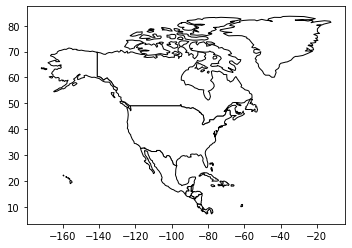

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
gpd.datasets.available


### ^^ Confusing 

### Try with a downloaded library that needs to stay in directory

<AxesSubplot:>

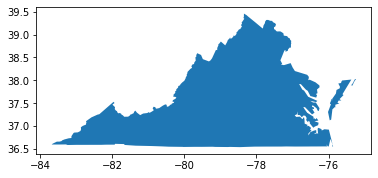

In [7]:
usa = gpd.read_file("/Users/ivanstoykov/Desktop/CDS 490/states_21basic/states.shp")
#usa.head()
usa[usa.STATE_ABBR == 'VA'].plot()


In [8]:
print(usa['geometry'][0])

MULTIPOLYGON (((-160.0738033454681 22.00417734795773, -160.0497093454457 21.98816434794282, -160.0898583454831 21.91587034787549, -160.1701373455579 21.86759634783053, -160.2022593455878 21.7953083477632, -160.2424063456252 21.80328034777063, -160.2263363456102 21.89159234785287, -160.121962345513 21.96397834792029, -160.0738033454681 22.00417734795773)), ((-159.3351743447802 21.94834334790573, -159.4395453448774 21.86807134783097, -159.5760213450045 21.88413634784593, -159.6402473450644 21.94836534790575, -159.7365923451541 21.9644203479207, -159.8008143452139 22.03666634798799, -159.7125063451317 22.14905934809266, -159.5760123450045 22.21317934815238, -159.3913673448326 22.22912034816722, -159.3431953447877 22.19701634813732, -159.2950253447428 22.12481234807008, -159.3271303447727 22.04463934799541, -159.3351743447802 21.94834334790573)), ((-157.6733303432325 21.29802734730007, -157.68137134324 21.27394234727764, -157.7215013432774 21.28197134728512, -157.8258713433746 21.249863347

In [11]:
geolocator = Nominatim(user_agent="GMU")
print( coord['X'] + ', ' + coord['Y'])
#location = geolocator.reverse(coord['X'][0], coord['Y'][0])
#print(type(float(coord['X'][0])))

0        42.1889634352895, -71.8448098585561
1         42.188742998623, -71.8447079596796
2        42.1887950511299, -71.8446159129388
3        42.1889483562912, -71.8447523633756
4        42.1890105371223, -71.8447870765504
                        ...                 
49995    37.9701970744255, -87.5427435394234
49996    37.9703921845795, -87.5426918912892
49997    37.9701643760669, -87.5427652331434
49998    37.9701999056073, -87.5427131712542
49999     37.9702355075375, -87.542762824684
Length: 50000, dtype: object
